In [ ]:
- title: Занятие 9
- author: Svetlana Medvedeva
- date: 2024-10-29
- slug: 2024_lpr_lab09
- ipynb_url: download/2024_lpr_lab09.ipynb

# Предобработка данных

# Работа с пропусками. Объединение датафреймов.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Проверка дубликатов и их удаление

In [3]:
df = pd.DataFrame({
    'A': ['1', '2', '4', '7', '10', '1'],
    'B': ['ab', 'c', 'bc', 'ab', 'efd', 'ab'],
    'C': [4, 4, 3.5, 15, 5, 4]})

df

,A,B,C
0,1,ab,4.0
1,2,c,4.0
2,4,bc,3.5
3,7,ab,15.0
4,10,efd,5.0
5,1,ab,4.0


In [4]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [5]:
df.duplicated(subset = ['B', 'C'])

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [6]:
df = df.drop_duplicates()

In [7]:
df

,A,B,C
0,1,ab,4.0
1,2,c,4.0
2,4,bc,3.5
3,7,ab,15.0
4,10,efd,5.0


Если нужно удалить дубликаты по заданному набору полей, то есть параметр subset, в котором указывается по каким полям удалять дубликаты.

In [8]:
df.drop_duplicates(subset=['B'])

,A,B,C
0,1,ab,4.0
1,2,c,4.0
2,4,bc,3.5
4,10,efd,5.0


Скачайте файл [netflix_titles.csv](http://python.mipt.ru/lpr/extra/lab09/netflix_titles.csv) для выполнения последующего кода

In [9]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [12]:
df['title'].value_counts()

title
Zubaan                                 1
Dick Johnson Is Dead                   1
Blood & Water                          1
Ganglands                              1
Jailbirds New Orleans                  1
                                      ..
Bangkok Breaking                       1
Vendetta: Truth, Lies and The Mafia    1
The Starling                           1
The Great British Baking Show          1
Sankofa                                1
Name: count, Length: 8807, dtype: int64

In [11]:
df['director'] = df['director'].str.lower()

In [12]:
df['director'].value_counts().head(20)

director
rajiv chilaka             19
raúl campos, jan suter    18
suhas kadav               16
marcus raboy              16
jay karas                 14
cathy garcia-molina       13
martin scorsese           12
youssef chahine           12
jay chapman               12
steven spielberg          11
don michael paul          10
david dhawan               9
yılmaz erdoğan             8
kunle afolayan             8
hakan algül                8
lance bangs                8
troy miller                8
fernando ayllón            8
quentin tarantino          8
ryan polito                8
Name: count, dtype: int64

In [13]:
('rajiv chilaka' in 'raúl campos, jan suter') or ('raúl campos' in 'raúl campos, jan suter')

True

In [14]:
df['director'] = df['director'].astype('category')

In [15]:
def well_known_director(row):
    if ('rajiv chilaka' in row) or ('raúl campos' in row) or ('jan suters' in row) or ('suhas kadav' in row) or ('marcus raboy' in row):
        return 'well-known director'
    else:
        return 'NON well-known director'

In [16]:
df['famouse_director'] = df['director'].apply(well_known_director)

In [17]:
df['famouse_director'].fillna('NON well-known director').value_counts()

famouse_director
NON well-known director    8733
well-known director          74
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   show_id           8807 non-null   object  
 1   type              8807 non-null   object  
 2   title             8807 non-null   object  
 3   director          6173 non-null   category
 4   cast              7982 non-null   object  
 5   country           7976 non-null   object  
 6   date_added        8797 non-null   object  
 7   release_year      8807 non-null   int64   
 8   rating            8803 non-null   object  
 9   duration          8804 non-null   object  
 10  listed_in         8807 non-null   object  
 11  description       8807 non-null   object  
 12  famouse_director  6173 non-null   object  
dtypes: category(1), int64(1), object(11)
memory usage: 1007.4+ KB


In [19]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [20]:
df['cast'].value_counts()

cast
David Attenborough                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                        14
Samuel West                                                                                                                                                    10
Jeff Dunham                                                                                                                                                     7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                          6
                                                                                                                                                               ..
Ali Suliman, Saleh Bakr

In [21]:
df['country'].value_counts()

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [22]:
df['date_added'].value_counts()

date_added
January 1, 2020       109
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
February 2, 2017        1
September 11, 2019      1
May 17, 2015            1
June 5, 2018            1
October 14, 2017        1
Name: count, Length: 1767, dtype: int64

In [23]:
'January 1, 2020 '.split(',')[0].split()[-1]

'1'

In [25]:
def to_date(row):
    if isinstance(row, float):
        return row

    row_month = 'no'
    
    if 'January' in row:
        row_month = '01'
    if 'February' in row:
        row_month = '02'
    if 'March' in row:
        row_month = '03'
    if 'April' in row:
        row_month = '04'
    if 'May' in row:
        row_month = '05'
    if 'June' in row:
        row_month = '06'
    if 'July' in row:
        row_month = '07'
    if 'August' in row:
        row_month = '08'
    if 'September' in row:
        row_month = '09'
    if 'October' in row:
        row_month = '10'
    if 'November' in row:
        row_month = '11'
    if 'December' in row:
        row_month = '12'

    row_day = row.split(',')[0].split()[-1]
    row_year = row.split(' ')[-1]
    row_date = row_year + '-' + row_month + '-' + row_day

    return row_date

In [26]:
df['date_added'] = df['date_added'].apply(to_date)

In [27]:
df['show_id'] = df['show_id'].astype('category')
df['type'] = df['type'].astype('category')
df['title'] = df['title'].astype('category')
df['country'] = df['country'].astype('category')
df['release_year'] = df['release_year'].astype('int32')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   show_id           8807 non-null   category
 1   type              8807 non-null   category
 2   title             8807 non-null   category
 3   director          6173 non-null   category
 4   cast              7982 non-null   object  
 5   country           7976 non-null   category
 6   date_added        8797 non-null   object  
 7   release_year      8807 non-null   int32   
 8   rating            8803 non-null   object  
 9   duration          8804 non-null   object  
 10  listed_in         8807 non-null   object  
 11  description       8807 non-null   object  
 12  famouse_director  6173 non-null   object  
dtypes: category(5), int32(1), object(7)
memory usage: 1.4+ MB


## Удаление столбцов и строк. Отсутствующие значения.

In [29]:
# np.NaN is deprecated since numpy2.0
# df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, np.NaN, np.nan]})
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, np.nan, np.nan]})
df

,A,B,C
0,1,4,7.0
1,2,5,NaN
2,3,6,NaN


Проверка на NaN-ы:

In [30]:
df.isna()

,A,B,C
0,False,False,False
1,False,False,True
2,False,False,True


In [31]:
df.isna().sum()

A    0
B    0
C    2
dtype: int64

Удалять строки и столбцы с пустыми значениями можно с помощью функции `dropna`. Обратите внимание, что применение функции без присваивания создает новый объект, а не меняет *df*.

In [32]:
df = df.dropna()

In [33]:
df

,A,B,C
0,1,4,7.0


Как и у многих других функций библиотек `numpy` и `pandas` есть аргумент `axis`, который отвечает за выбор: просмотр строк или просмотр столбцов:

In [34]:
df

,A,B,C
0,1,4,7.0


In [35]:
df.dropna(axis = 0)

,A,B,C
0,1,4,7.0


In [36]:
df.dropna(axis = 1)

,A,B,C
0,1,4,7.0


Пропущенные значения можно не только удалить, но и заполнить:

In [37]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


Заполнить можно значением:

In [38]:
df.fillna(value=0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


Словарем значений:

In [39]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


Методом заполнения вперед:

In [40]:
df.fillna(method="ffill")

C:\Users\kleme\AppData\Local\Temp\ipykernel_65608\3944122520.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


Методом заполенения назад:

In [41]:
df.fillna(method="bfill")

C:\Users\kleme\AppData\Local\Temp\ipykernel_65608\3896554658.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,3.0,NaN,4.0
3,NaN,3.0,NaN,4.0


И, конечно, нужно уметь удалять ненужные столбцы. Для этого есть функция `drop`. Здесь мы уже не обращаем внимание на наличие или отсутствие пустых значений. Параметрами подаются список названий колонок для удаления, и часто указывается `axis=1`, т.к. по умолчанию считается axis=0, в этом случае поиск будет по индексам строк.

In [42]:
df.drop(["C"], axis = 1)

,A,B,D
0,NaN,2.0,0.0
1,3.0,4.0,1.0
2,NaN,NaN,NaN
3,NaN,3.0,4.0


In [43]:
df.fillna(method="bfill").drop(["A", "C"], axis = 1)

C:\Users\kleme\AppData\Local\Temp\ipykernel_65608\191760694.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill").drop(["A", "C"], axis = 1)


,B,D
0,2.0,0.0
1,4.0,1.0
2,3.0,4.0
3,3.0,4.0


Функция `drop` также не изменяет исходный объект, а создает новый. Для изменения исходного объекта нужно присвоить ему этот результат:

In [44]:
df = df.fillna(method="bfill").drop(["A", "C"], axis = 1)

C:\Users\kleme\AppData\Local\Temp\ipykernel_65608\330342657.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill").drop(["A", "C"], axis = 1)


In [45]:
df

,B,D
0,2.0,0.0
1,4.0,1.0
2,3.0,4.0
3,3.0,4.0


Еще пара способов:

In [46]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [47]:
df.mean()

A    3.000000
B    3.000000
C         NaN
D    1.666667
dtype: float64

In [48]:
df.fillna(df.mean())

,A,B,C,D
0,3.0,2.0,NaN,0.000000
1,3.0,4.0,NaN,1.000000
2,3.0,3.0,NaN,1.666667
3,3.0,3.0,NaN,4.000000


In [49]:
df.fillna(df.min())

,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,2.0,NaN,0.0
3,3.0,3.0,NaN,4.0


In [50]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [51]:
df.min()

A    3.0
B    2.0
C    NaN
D    0.0
dtype: float64

In [52]:
df.fillna(df.min())

,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,2.0,NaN,0.0
3,3.0,3.0,NaN,4.0


In [58]:
print(df.max().min())
print(df.min())

3.0
A    3.0
B    2.0
C    NaN
D    0.0
dtype: float64


In [55]:
df.fillna(df.min()).fillna(df.max().min())

,A,B,C,D
0,3.0,2.0,3.0,0.0
1,3.0,4.0,3.0,1.0
2,3.0,2.0,3.0,0.0
3,3.0,3.0,3.0,4.0


**Упражнение 1.** Объясните, как работает ячейка выше.

In [ ]:
# Мы мы хотим заменить наны чем-то. сначала заменили наны минимальными значениями столбца, 
# но в стобце из нанов минимум и есть нан.
# Потом в нем мы заменили наны на максимальный из минимальных элементов, он уже не нан (он равен 3)

**Упражнение 2.** Дан датафрейм в ячейке ниже, состоящий из 4 единиц на диагонали и nan-ов. Заполнить его так, чтобы в нем было 8 единиц и 8 двоек. Использовать только `fillna`.

In [68]:
df = pd.DataFrame([[1, np.nan, np.nan, np.nan],
                   [np.nan, 1, np.nan, np.nan],
                   [np.nan, np.nan, 1, np.nan],
                   [np.nan, np.nan, np.nan, 1]],
                columns=list("ABCD"))
df.iloc[:3, :2] = df.iloc[:3, :2].fillna(1)
df = df.fillna(2)
df

,A,B,C,D
0,1.0,1.0,2.0,2.0
1,1.0,1.0,2.0,2.0
2,1.0,1.0,1.0,2.0
3,2.0,2.0,2.0,1.0


In [69]:
df[1:2] = df[1:2].fillna(1)
df

,A,B,C,D
0,1.0,1.0,2.0,2.0
1,1.0,1.0,2.0,2.0
2,1.0,1.0,1.0,2.0
3,2.0,2.0,2.0,1.0


**Упражнение 3.** Из полученного датафрейма удалить столбец (или столбцы) с минимальной суммой значений.

In [75]:
df[df.columns[df.sum() != df.sum(axis=0).min()]]

,C,D
0,2.0,2.0
1,2.0,2.0
2,1.0,2.0
3,2.0,1.0


## Еще работа с данными. Пассажиры Титаника.

Скачайте файл [Titanic.csv](http://python.mipt.ru/lpr/extra/lab09/Titanic.csv) для выполнения последующего кода

In [80]:
df = pd.read_csv('Titanic.csv') #поменять путь на актуальный для вас

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
df.shape

(418, 12)

In [84]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Gender       418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


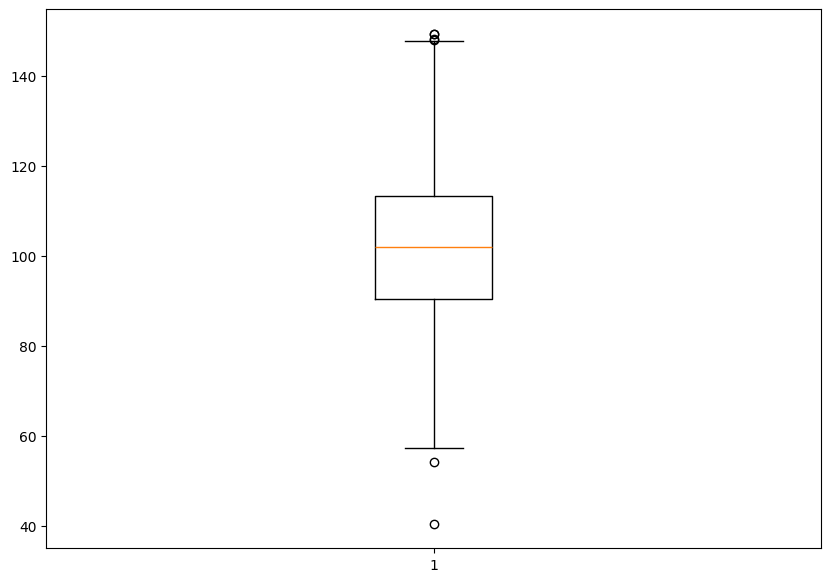

In [86]:
np.random.seed(10)
data = np.random.normal(100, 20, 200)
 
fig = plt.figure(figsize =(10, 7))

plt.boxplot(data)
plt.show()

In [87]:
df['Fare'].value_counts().index

Index([   7.75,    26.0,    8.05,    13.0,  7.8958,    10.5,   7.775,   7.225,
        7.2292,    21.0,
       ...
        12.875,  21.075,    39.4,   20.25,    47.1, 13.8625,  7.7208,    90.0,
         108.9, 22.3583],
      dtype='float64', name='Fare', length=169)

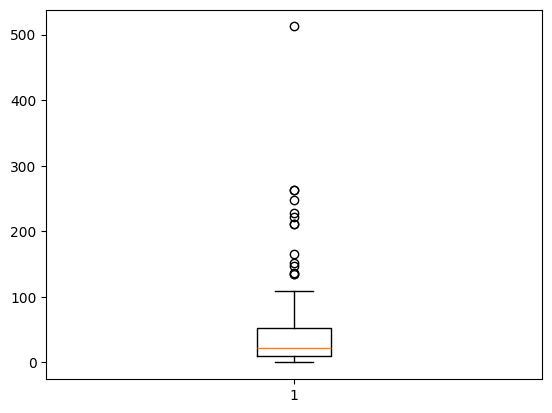

In [88]:
plt.boxplot(df['Fare'].value_counts().index)
plt.show()

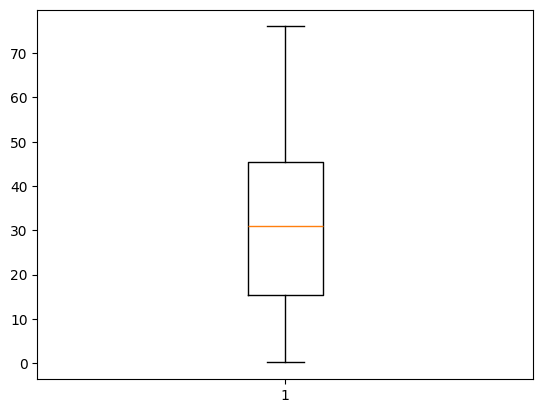

In [89]:
plt.boxplot(df['Age'].value_counts().index)
plt.show()

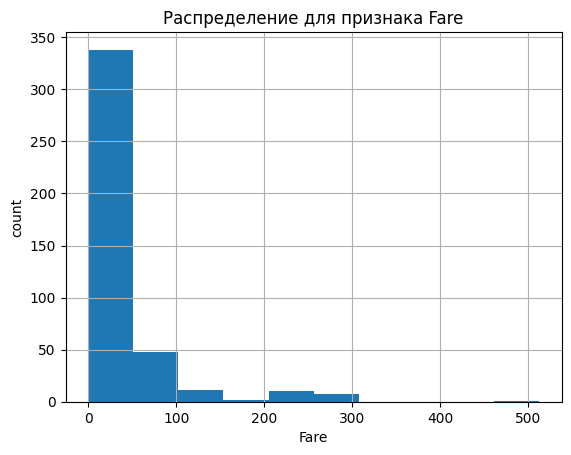

In [90]:
df['Fare'].hist()
plt.title('Распределение для признака Fare')
plt.xlabel('Fare')
plt.ylabel('count');

## Объединение датафреймов

В pandas для объединения датафреймов есть три метода pd.concat(), merge() и join(). Подробнее о них можно посмотреть: https://newtechaudit.ru/pandas-merge-join-concatenate/

**Упражнение 4.** Найдите средний возраст пассажиров

In [93]:
df["Age"].mean()

np.float64(30.272590361445783)

**Упражнение 5.** Выведите имя самого молодого пассажира.

In [94]:
df[df["Age"] == df["Age"].min()]["Name"]

354    Dean, Miss. Elizabeth Gladys Millvina""
Name: Name, dtype: object

**Упражнение 6.** Посчитайте доли пассажиров по классам обслуживания (Pclass)

In [95]:
a = df.groupby(["Pclass"]).agg({"Pclass": "count"})
print(a / a["Pclass"].sum())

          Pclass
Pclass          
1       0.255981
2       0.222488
3       0.521531


**Упражнение 7.** Найдите средние возраста пассажиров по классам обслуживания.

In [98]:
df.groupby(["Pclass"]).agg({"Age": "mean"})

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


**Упражнение 8.** Удалите столбец с наибольшим числом пропусков.

In [116]:
#df = df[df.columns[df.isna().sum() != df.isna().sum().max()]]
print(df.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Gender          0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64


**Упражнение 9.** Удалите столбцы с наибольшим числом уникальных значений.

In [118]:
df = df[df.columns[df.nunique() != df.nunique().max()]]
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,NaN,0,0,359309,8.0500,S


**Упражнение 10.** Найдите доли выживших среди мужчин, среди женщин и среди всех пассажиров.

In [129]:
print("all:", df["Survived"].sum() / df["Survived"].count())
df1 = df.groupby(["Gender"]).agg({"Survived": "mean"})
df1

all: 0.36363636363636365


,Survived
Gender,
female,1.0
male,0.0


**Упражнение 11.** Найдите доли выживших по классам обслуживания.

In [146]:
df1 = df.groupby(["Pclass"]).agg({"Survived":"mean"})
df1

,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


**Упражнение 12.** Найдите доли выживших среди возрастных категорий 18-, 18-60, 60+.

In [145]:
df1 = df.copy()
df1.loc[df1["Age"] < 18, "Age survived"] = "18-"
df1.loc[(df1["Age"] >= 18) & (df1["Age"] <= 60), "Age survived"] = "18-60"
df1.loc[df1["Age"] > 60, "Age survived"] = "60+"
df1.groupby(["Age survived"]).agg({"Survived":"mean"})

,Survived
Age survived,
18-,0.414634
18-60,0.378571
60+,0.363636


**Упражнение 13.** Любым из рассмотренных методов реализуйте left join, right join, inner join, outer join датафреймов df1 и df2 (объединение по полю A).

In [ ]:
df1 = pd.DataFrame({
    'A': ['1', '2', '4', '7', '10'],
    'B': ['ab', 'c', 'bc', 'ab', 'efd'],
    'C': [4, 4, 3.5, 15, 5]})

df2 = pd.DataFrame({
    'A': ['1', '2', '4', '7', '10'],
    'F': ['n22', 'c1', 'b8', 'a589', 'b95'],
    'D': [100, 400, 30, 150, 50]})
df1

,A,F,D
0,1,n22,100
1,2,c1,400
2,4,b8,30
3,7,a589,150
4,10,b95,50


In [150]:
df2

,A,F,D
0,1,n22,100
1,2,c1,400
2,4,b8,30
3,7,a589,150
4,10,b95,50


In [151]:
# LEFT JOIN - пересечение и все, что в первом
df1.set_index("A").join(df2.set_index("A"), how="left")

,B,C,F,D
A,,,,
1,ab,4.0,n22,100
2,c,4.0,c1,400
4,bc,3.5,b8,30
7,ab,15.0,a589,150
10,efd,5.0,b95,50


In [152]:
# RIGHT JOIN - пересечение и все, что во втором
df1.set_index("A").join(df2.set_index("A"), how="right")

,B,C,F,D
A,,,,
1,ab,4.0,n22,100
2,c,4.0,c1,400
4,bc,3.5,b8,30
7,ab,15.0,a589,150
10,efd,5.0,b95,50


In [154]:
# INNER JOIN - пересечение
df1.set_index("A").join(df2.set_index("A"), how="inner")

,B,C,F,D
A,,,,
1,ab,4.0,n22,100
2,c,4.0,c1,400
4,bc,3.5,b8,30
7,ab,15.0,a589,150
10,efd,5.0,b95,50


In [155]:
# OUTER JOIN - объединение
df1.set_index("A").join(df2.set_index("A"), how="outer")

,B,C,F,D
A,,,,
1,ab,4.0,n22,100
10,efd,5.0,b95,50
2,c,4.0,c1,400
4,bc,3.5,b8,30
7,ab,15.0,a589,150
